<a href="https://colab.research.google.com/github/zahidprince786/S2526_AIT_LAB/blob/main/AIT_Lab_with_problrm_statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment 1:**
Implementation of Graph search algorithms (Breadth first search and Depth First Search) using following constraints.

BFS: Pick any node, visit the adjacent unvisited vertex, mark it as visited, display it, and insert it in a queue. 	If there are no remaining adjacent vertices left, remove the first vertex from the queue. Apply recursion concept to follow the above steps until the queue is empty or the desired node is found.
DFS: Pick any node. If it is unvisited, mark it as visited and recur on all its adjacent nodes. Repeat until all the nodes are visited, or the node to be searched is found.
Tools- Python


BFS:
A city planner is designing a smart traffic control system for a metropolitan area. The road network is modeled as a graph, where each intersection is a node, and roads between intersections are edges with known travel times. The goal is to design a system that quickly determines the shortest path (minimum travel time) between two intersections during peak traffic hours to reroute emergency vehicles effectively. To achieve this, implement the Breadth-First Search (BFS) algorithm to identify the fastest route between any two given intersections. The BFS traversal must consider the travel time on each road to optimize the path, and should mark visited intersections and queue them appropriately until the shortest path is found.

DFS
A firefighting drone is deployed to search for fire hotspots in a dense forest, which is represented as a 2D grid. Each grid cell may be clear ('O'), obstructed ('X'), or contain a hotspot ('H'). The drone starts from a base station ('S') and must locate the nearest hotspot using Depth-First Search (DFS).
The drone can move only in four directions: up, down, left, and right, and cannot fly over obstructed cells ('X').
The task is to implement the DFS algorithm to explore the forest recursively, marking each visited cell and backtracking when a dead-end is encountered. The goal is to find a valid path from the starting point to any hotspot (‘H’) using DFS traversal.


In [ ]:
from collections import deque

def bfs_shortest_path(graph, start, goal):
    visited = set()
    queue = deque([[start]])

    if start == goal:
        return [start]

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node not in visited:
            for neighbor in graph[node]:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

                if neighbor == goal:
                    return new_path
            visited.add(node)

    return None

# Example graph representing intersections and roads
city_graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Test
start = 'A'
goal = 'F'
shortest_path = bfs_shortest_path(city_graph, start, goal)
print("Shortest path from", start, "to", goal, "is:", shortest_path)


Shortest path from A to F is: ['A', 'C', 'F']


In [ ]:
def dfs_forest(grid, x, y, visited, path):
    rows, cols = len(grid), len(grid[0])

    # Boundary and obstacle check
    if x < 0 or y < 0 or x >= rows or y >= cols or grid[x][y] == 'X' or visited[x][y]:
        return False

    path.append((x, y))
    visited[x][y] = True

    if grid[x][y] == 'H':
        return True

    # Move in 4 directions
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        if dfs_forest(grid, x+dx, y+dy, visited, path):
            return True

    path.pop()
    return False

# Forest grid
forest = [
    ['S', 'O', 'X', 'O'],
    ['X', 'O', 'X', 'O'],
    ['O', 'O', 'O', 'H'],
    ['X', 'X', 'O', 'X']
]

rows, cols = len(forest), len(forest[0])
visited = [[False for _ in range(cols)] for _ in range(rows)]
path = []

# Find start point
for i in range(rows):
    for j in range(cols):
        if forest[i][j] == 'S':
            start_x, start_y = i, j

found = dfs_forest(forest, start_x, start_y, visited, path)

if found:
    print("Path to hotspot:", path)
else:
    print("No hotspot found.")


Path to hotspot: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3)]


**Experiment 2:** Implementation of Hill climbing algorithm for Heuristic search approach using following constraints in python.
i.	Create a function generating all neighbours of a solution
ii.	Create a function calculating the length of a route
iii.	Create a random solution generator
iv.  Create a Travelling salesman problem
Tools- Python, Online Simulator - https://graphonline.ru/en/

PROBLEM STATEMENT: 								CO1         S3

A logistics company employs autonomous warehouse robots to pick and deliver items from shelves to packaging stations in a large grid-based warehouse. The warehouse layout is represented as a 2D grid, with some cells blocked by shelves ('X'), while others are open for movement ('O'). The robot starts at a designated starting point 'S' and must reach the packaging station marked 'G'.
To optimize the robot’s movement path and avoid congestion or inefficient routes, implement a hill-climbing algorithm that uses a heuristic to minimize the distance from the current position to the packaging station.
The task is to generate all valid neighbor positions (moves) from the current position. Use a heuristic (e.g., Manhattan distance) to guide movement. Avoid local maxima or dead ends by comparing neighboring heuristic values. Ensure the robot reaches the goal with minimal steps.



In [ ]:
import random

# Sample 2D grid (5x6)
warehouse = [
    ['S', 'O', 'O', 'X', 'O', 'O'],
    ['X', 'X', 'O', 'X', 'O', 'X'],
    ['O', 'O', 'O', 'O', 'O', 'O'],
    ['O', 'X', 'X', 'X', 'X', 'O'],
    ['O', 'O', 'O', 'O', 'G', 'O']
]

# Define goal and start
def find_position(grid, char):
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == char:
                return (i, j)

start = find_position(warehouse, 'S')
goal = find_position(warehouse, 'G')

# Manhattan distance heuristic
def heuristic(pos, goal):
    return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

# Valid neighbors (up, down, left, right)
def get_neighbors(grid, position):
    x, y = position
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    neighbors = []
    for dx, dy in moves:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]):
            if grid[nx][ny] in ['O', 'G']:  # not blocked
                neighbors.append((nx, ny))
    return neighbors

# Hill Climbing Algorithm
def hill_climbing(grid, start, goal):
    current = start
    path = [current]

    while current != goal:
        neighbors = get_neighbors(grid, current)
        if not neighbors:
            print("Stuck at local maximum. No path to goal.")
            return path

        next_move = min(neighbors, key=lambda n: heuristic(n, goal))
        if heuristic(next_move, goal) >= heuristic(current, goal):
            print("Reached local maximum. Cannot improve further.")
            return path

        current = next_move
        path.append(current)

    return path

# Run the algorithm
path = hill_climbing(warehouse, start, goal)

# Print path
print("\nPath found:")
for step in path:
    print(step)

Reached local maximum. Cannot improve further.

Path found:
(0, 0)
(0, 1)
(0, 2)
(1, 2)
(2, 2)
(2, 3)
(2, 4)


**Experiment 3:** Implementation of A * Algorithm to find the optimal path using Python by following constraints.
•The goal of the A* algorithm is to find the shortest path from the starting point to the goal point as fast as possible.
•The full path cost (f) for each node is calculated as the distance to the starting node (g) plus the distance to the goal node (h).
•Distances is calculated as the manhattan distance (taxicab geometry) between nodes.

PROBLEM STATEMENT:

A disaster management team is developing an emergency evacuation planner for a flood-affected city. The city is modelled as a graph, where each node represents a safe zone or intersection, and edges represent possible routes, each with a known traversal cost like time or distance. To ensure the fastest evacuation path for rescue vehicles from an emergency site to a relief centre, you are asked to implement the A* algorithm in Python. The heuristic function will estimate the cost to the goal using Manhattan distance, guiding the search intelligently toward the optimal path.
The task is to use the A* algorithm to compute the shortest path from the emergency site to the relief centre. Calculate the full cost f(n) = g(n) + h(n) for each node, where g(n) is the actual cost from the start, and h(n) is the heuristic estimate to the goal using taxicab geometry. Calculate the optimal route and the total cost.


In [ ]:
import heapq

def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_search(start, goal, graph):
    open_list = []
    heapq.heappush(open_list, (0, start))  # (f, node)

    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0

    f_score = {node: float('inf') for node in graph}
    f_score[start] = manhattan_distance(start, goal)

    while open_list:
        current_f, current = heapq.heappop(open_list)

        if current == goal:
            # reconstruct path
            path = []
            total_cost = g_score[goal]
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, total_cost

        for neighbor, cost in graph[current]:
            tentative_g = g_score[current] + cost
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + manhattan_distance(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None, float('inf')
graph = {
    (0, 0): [((1, 0), 1), ((0, 1), 4)],
    (1, 0): [((0, 0), 1), ((1, 1), 2)],
    (0, 1): [((0, 0), 4), ((1, 1), 3)],
    (1, 1): [((1, 0), 2), ((0, 1), 3), ((2, 1), 1)],
    (2, 1): [((1, 1), 1), ((2, 2), 2)],
    (2, 2): [((2, 1), 2)]
}

start = (0, 0)
goal = (2, 2)

path, cost = a_star_search(start, goal, graph)
print("Optimal Path:", path)
print("Total Cost:", cost)


Optimal Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2)]
Total Cost: 6


**Experiment 4:** Implementation of Mini-Max algorithm uses recursion to search through the game-tree using python by applying following constraints.
•In this algorithm two players play the checker’s game; one is called MAX and other is called MIN.
•Both the players fight it as the opponent player gets the minimum benefit while they get the maximum benefit.
•Both Players of the game are opponent of each other, where MAX will select the maximized value and MIN will select the minimized value.
•The minimax algorithm performs a depth-first search algorithm for the exploration of the complete game tree.
•The minimax algorithm proceeds all the way down to the terminal node of the tree, then backtrack the tree as the recursion.
Tools : Python

PROBLEM STATEMENT:

You are designing an AI opponent for the popular two-player game of Tic-Tac-Toe. The game is played on a 3x3 grid where players take turns marking cells, one with X (MAX player) and the other with O (MIN player). The goal is to get three of your marks in a row (horizontally, vertically, or diagonally).
To make the AI play intelligently, the task is to implement the Mini-Max algorithm using recursion in Python. The algorithm should explore all possible moves (game tree) from the current board position. Use MAX to simulate the AI’s turn and MIN to simulate the opponent’s turn. Evaluate each final (terminal) board state to choose the best possible move for the AI (MAX), assuming the opponent (MIN) also plays optimally. The AI should return the move that maximizes its chance of winning or minimizes the chance of losing.


In [ ]:
def print_board(board):
    for row in board:
        print(row)
    print()

def check_winner(board):
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != '_':
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != '_':
            return board[0][i]
    if board[0][0] == board[1][1] == board[2][2] != '_':
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != '_':
        return board[0][2]
    return None

def is_full(board):
    return all(cell != '_' for row in board for cell in row)

def minimax(board, is_maximizing):
    winner = check_winner(board)
    if winner == 'X':
        return 1
    elif winner == 'O':
        return -1
    elif is_full(board):
        return 0

    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == '_':
                    board[i][j] = 'X'
                    score = minimax(board, False)
                    board[i][j] = '_'
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == '_':
                    board[i][j] = 'O'
                    score = minimax(board, True)
                    board[i][j] = '_'
                    best_score = min(score, best_score)
        return best_score

def best_move(board):
    best_score = -float('inf')
    move = None
    for i in range(3):
        for j in range(3):
            if board[i][j] == '_':
                board[i][j] = 'X'
                score = minimax(board, False)
                board[i][j] = '_'
                if score > best_score:
                    best_score = score
                    move = (i, j)
    return move
board = [
    ['X', 'O', 'X'],
    ['_', 'O', '_'],
    ['_', '_', '_']
]

print("Current Board:")
print_board(board)

move = best_move(board)
print(f"AI recommends move at position: {move}")


Current Board:
['X', 'O', 'X']
['_', 'O', '_']
['_', '_', '_']

AI recommends move at position: (2, 1)


**Experiment 5:** Implementation of Ant Colony Optimization to Optimize Ride-Sharing Trip Duration using Python by following constraints.
•To forecast travel times between every pair of pick-up and drop-off locations.
•To find the shortest route that visits a set of locations.
•To implement optimization techniques are required to intelligently search the solution space and find near-optimal solutions.
Tools: Python

PROBLEM STATEMENT:

A food delivery app wants to optimize the route of a delivery driver who has to deliver meals to multiple customers in different locations as quickly as possible. The city is modeled as a graph, where each node is a delivery point, and edges represent travel time between them. To handle this efficiently, you will implement the Ant Colony Optimization (ACO) algorithm in Python.
The task is to estimate travel times between all delivery points. Use ACO to find the best delivery route that reduces total trip duration. Simulate ants exploring possible paths, updating pheromone levels, and using heuristics to choose the most promising routes. The goal is to deliver food quickly and efficiently by finding near-optimal delivery routes through ACO.


In [ ]:
import random
import numpy as np

# Distance matrix (simulated travel time between delivery points)
distance_matrix = [
    [0, 2, 2, 5, 7],
    [2, 0, 4, 8, 2],
    [2, 4, 0, 1, 3],
    [5, 8, 1, 0, 2],
    [7, 2, 3, 2, 0]
]

num_ants = 5
num_cities = len(distance_matrix)
num_iterations = 100
evaporation_rate = 0.5
alpha = 1  # pheromone importance
beta = 2   # distance importance

# Initialize pheromone levels
pheromone = [[1 for _ in range(num_cities)] for _ in range(num_cities)]

def calculate_probability(from_city, to_city, visited):
    if to_city in visited:
        return 0
    pher = pheromone[from_city][to_city] ** alpha
    heuristic = (1 / distance_matrix[from_city][to_city]) ** beta
    return pher * heuristic

def select_next_city(current_city, visited):
    probabilities = [calculate_probability(current_city, i, visited) for i in range(num_cities)]
    total = sum(probabilities)
    if total == 0:
        return random.choice([i for i in range(num_cities) if i not in visited])
    probabilities = [p / total for p in probabilities]
    return np.random.choice(range(num_cities), p=probabilities)

def build_solution():
    solutions = []
    for _ in range(num_ants):
        visited = []
        current_city = random.randint(0, num_cities - 1)
        visited.append(current_city)

        while len(visited) < num_cities:
            next_city = select_next_city(current_city, visited)
            visited.append(next_city)
            current_city = next_city
        solutions.append(visited)
    return solutions

def route_distance(route):
    return sum(distance_matrix[route[i]][route[i + 1]] for i in range(len(route) - 1)) + distance_matrix[route[-1]][route[0]]

def update_pheromones(solutions):
    global pheromone
    for i in range(num_cities):
        for j in range(num_cities):
            pheromone[i][j] *= (1 - evaporation_rate)

    for route in solutions:
        dist = route_distance(route)
        for i in range(num_cities):
            from_city = route[i]
            to_city = route[(i + 1) % num_cities]
            pheromone[from_city][to_city] += 1.0 / dist

best_route = None
best_distance = float('inf')

for _ in range(num_iterations):
    solutions = build_solution()
    update_pheromones(solutions)

    for route in solutions:
        dist = route_distance(route)
        if dist < best_distance:
            best_distance = dist
            best_route = route

print("Best route found:", best_route)
print("Total trip duration:", best_distance)


Best route found: [1, np.int64(4), np.int64(3), np.int64(2), np.int64(0)]
Total trip duration: 9


**Experiment 6:** Solve a Map Coloring problem using constraint satisfaction approach by applying following constraints
•Assign each territory a color such that no two adjacent territories have the same color by considering following parameters: Domains, Variables and Constraints
•Apply Basic Greedy Coloring Algorithm:  Color first vertex with first color, do following for remaining V-1 vertices.
•Consider the currently picked vertex and color it with the lowest numbered color that has not been used on any previously colored vertices adjacent to it. If all previously used colors appear on vertices adjacent to v, assign a new color to it.
Tools- Python, Online Simulator - https://graphonline.ru/en/

PROBLEM STATEMENT:

A school wants to organize a classroom seating plan for a group of students. To make it easy to identify student groups, each student will wear a color tag. But here's the catch: no two students sitting next to each other (left, right, front, or back) can wear the same color tag. The classroom is arranged as a graph, where each seat is a node, and an edge connects any two seats that are next to each other.
The task is to use the constraint satisfaction approach to assign colors to each student (seat). Apply the greedy coloring algorithm. Color the first seat with the first color. For each next seat, choose the lowest numbered color that hasn’t been used by any adjacent (neighboring) seats. If no color is available, assign a new color.


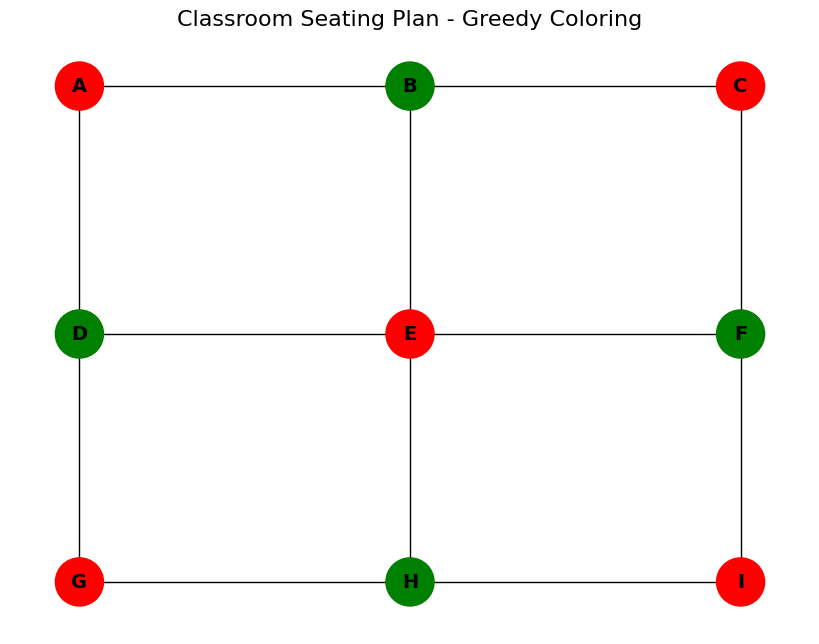

Seat : Assigned Color
A : red
B : green
C : red
D : green
E : red
F : green
G : red
H : green
I : red


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph (Classroom seating as adjacency list)
graph = {
    'A': ['B', 'D'],
    'B': ['A', 'C', 'E'],
    'C': ['B', 'F'],
    'D': ['A', 'E', 'G'],
    'E': ['B', 'D', 'F', 'H'],
    'F': ['C', 'E', 'I'],
    'G': ['D', 'H'],
    'H': ['E', 'G', 'I'],
    'I': ['F', 'H']
}

# Available color palette (extendable if needed)
color_palette = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'cyan', 'brown']

# Greedy coloring algorithm
def greedy_coloring(graph):
    color_assignment = {}
    for node in graph:
        # Collect used colors from adjacent nodes
        used_colors = {color_assignment.get(neigh) for neigh in graph[node] if neigh in color_assignment}
        # Assign the lowest unused color
        for color in color_palette:
            if color not in used_colors:
                color_assignment[node] = color
                break
    return color_assignment

# Apply the greedy coloring
coloring_result = greedy_coloring(graph)

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Prepare node colors from coloring result
node_colors = [coloring_result[node] for node in G.nodes()]

# Set positions manually to mimic a 3x3 classroom seating grid
positions = {
    'A': (0, 2),
    'B': (1, 2),
    'C': (2, 2),
    'D': (0, 1),
    'E': (1, 1),
    'F': (2, 1),
    'G': (0, 0),
    'H': (1, 0),
    'I': (2, 0)
}

# Plotting the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos=positions, with_labels=True, node_color=node_colors, node_size=1200, font_size=14, font_weight='bold')
plt.title("Classroom Seating Plan - Greedy Coloring", fontsize=16)
plt.axis('off')
plt.show()

# Print the color assignment
print("Seat : Assigned Color")
for seat, color in coloring_result.items():
    print(f"{seat} : {color}")


**Experiment 7:** Implementation of Monkey Banana Problem in Goal Stack planning using python by applying following constraints.
Imagine a room containing a monkey, chair and some bananas. That have been hanged from the centre of ceiling. If the monkey is clever enough, he can reach the bananas by placing the chair directly below the bananas and climb on the chair. The problem is to prove the monkey can reach the bananas. The monkey wants it, but cannot jump high enough from the floor. At the window of the room there is a box that the monkey can use. The monkey can perform the Following actions: -
1) Walk on the floor.
2) Climb the box.
3) Push the box around (if it is beside the box).
4) Grasp the banana if it is standing on the box directly under the banana.
Tools: Python

PROBLEM STATEMENT:
A playful puppy is trying to get its favorite toy placed on a high shelf in the living room. The puppy cannot jump high enough, but notices a small box nearby that can help. The room is shown as a 2D grid, with the puppy starting in one corner and the toy on a high shelf. The puppy can move (walk) across the floor, push the box to any location (if next to it), climb on top of the box, and grab the toy (if standing on the box directly below the shelf).
Using Goal Stack Planning, implement a solution in Python that helps the puppy plan the correct sequence of steps, navigate around any obstacles, and use the box smartly to finally reach and grab the toy.



In [ ]:
# Grid coordinates: (x, y)
toy_position = (2, 2)         # Toy is placed at center ceiling
box_position = [0, 0]         # Initial box position
puppy_position = [0, 1]       # Puppy starts in corner
has_toy = False
on_box = False

# Action log
actions = []

# Define room size (optional for visualization)
room_size = 3  # 3x3 grid

# Define helper functions
def walk(to):
    global puppy_position
    actions.append(f"Walk from {tuple(puppy_position)} to {to}")
    puppy_position[0], puppy_position[1] = to

def push_box(to):
    global puppy_position, box_position
    actions.append(f"Push box from {tuple(box_position)} to {to}")
    box_position[0], box_position[1] = to
    puppy_position[0], puppy_position[1] = to  # Puppy moves with box

def climb_box():
    global on_box
    actions.append("Climb on box")
    on_box = True

def grab_toy():
    global has_toy
    actions.append("Grab the toy")
    has_toy = True

# Goal Stack Planning
def goal_stack_planning():
    stack = ['HasToy']

    while stack:
        goal = stack.pop()

        if goal == 'HasToy':
            if has_toy:
                continue
            # Preconditions for grabbing toy
            if puppy_position == box_position == list(toy_position) and on_box:
                grab_toy()
            else:
                stack.append('HasToy')  # Retry after subgoals
                stack.append('OnBox')
                stack.append(('MoveBoxUnderToy', toy_position))

        elif goal == 'OnBox':
            if on_box:
                continue
            if puppy_position == box_position:
                climb_box()
            else:
                stack.append('OnBox')
                stack.append(('WalkTo', tuple(box_position)))

        elif isinstance(goal, tuple) and goal[0] == 'MoveBoxUnderToy':
            if box_position == list(goal[1]):
                continue
            stack.append(('MoveBoxUnderToy', goal[1]))
            stack.append(('WalkTo', tuple(box_position)))
            stack.append(('PushBoxTo', goal[1]))

        elif isinstance(goal, tuple) and goal[0] == 'WalkTo':
            if puppy_position == list(goal[1]):
                continue
            walk(goal[1])

        elif isinstance(goal, tuple) and goal[0] == 'PushBoxTo':
            if box_position == list(goal[1]):
                continue
            push_box(goal[1])

# Run the planner
goal_stack_planning()

# Display the steps
print("\nPlan to achieve goal:")
for step in actions:
    print("→", step)

# Final state
print("\nFinal State:")
print("Puppy Position:", tuple(puppy_position))
print("Box Position:", tuple(box_position))
print("On Box:", on_box)
print("Has Toy:", has_toy)



Plan to achieve goal:
→ Push box from (0, 0) to (2, 2)
→ Walk from (2, 2) to (0, 0)
→ Walk from (0, 0) to (2, 2)
→ Climb on box
→ Grab the toy

Final State:
Puppy Position: (2, 2)
Box Position: (2, 2)
On Box: True
Has Toy: True


**Experiment 8: ** Implementation of N-queen problem using backtracking algorithm using python
In the 4 Queens problem the object is to place 4 queens on a chessboard in such a way that no queens can capture a piece. This means that no two queens may be placed on the same row, column, or diagonal.

Tools: Python

PROBLEM STATEMENT:
Imagine a museum with multiple rooms arranged like a chessboard grid. Your job is to place 4 security guards in such a way that no two guards can watch each other. A guard can monitor all rooms in the same row, all rooms in the same column, and all rooms diagonally.
Using the backtracking algorithm in Python, implement a program to place 4 guards on a 4x4 grid (one per row), Ensure that no guard is under surveillance by another, and display all possible valid arrangements.



In [ ]:
N = 4  # Size of the grid

# Function to print the board
def print_board(board):
    for row in board:
        print(" ".join('G' if col else '.' for col in row))
    print()

# Check if it's safe to place a guard at board[row][col]
def is_safe(board, row, col):
    # Check vertical up
    for i in range(row):
        if board[i][col] == 1:
            return False

    # Check upper left diagonal
    i, j = row - 1, col - 1
    while i >= 0 and j >= 0:
        if board[i][j] == 1:
            return False
        i -= 1
        j -= 1

    # Check upper right diagonal
    i, j = row - 1, col + 1
    while i >= 0 and j < N:
        if board[i][j] == 1:
            return False
        i -= 1
        j += 1

    return True

# Backtracking function
def solve_n_queens(board, row):
    if row == N:
        print_board(board)
        return True

    res = False
    for col in range(N):
        if is_safe(board, row, col):
            board[row][col] = 1
            res = solve_n_queens(board, row + 1) or res
            board[row][col] = 0  # Backtrack

    return res

# Initialize the board
board = [[0 for _ in range(N)] for _ in range(N)]

print("Valid configurations for placing 4 guards:\n")
solve_n_queens(board, 0)


Valid configurations for placing 4 guards:

. G . .
. . . G
G . . .
. . G .

. . G .
G . . .
. . . G
. G . .



True

**Experiment 10:** Implement simple fact for following:
a. Ram likes mango.
b. Seema is a girl.
c. Bill likes Cindy.
 d. Rose is red.
e. John owns gold.
Tools-Prolog

PROBLEM STATEMENT:

Develop a simple fact-based knowledge representation system using logic-based programming (Prolog or Python).
Implement and store the following facts in the knowledge base:
•	Ram likes mango
•	Seema is a girl
•	Bill likes Cindy
•	Rose is red
•	John owns gold
Provide support for answering simple queries like:
•	Is Seema a girl?
•	Does Bill like someone?
•	What color is Rose?


In [ ]:
# Simple Knowledge Base using dictionaries

# Knowledge Base: Each key is a predicate with subject-object pairs
knowledge_base = {
    'likes': {
        'Ram': 'Mango',
        'Bill': 'Cindy'
    },
    'is_a': {
        'Seema': 'Girl'
    },
    'color': {
        'Rose': 'Red'
    },
    'owns': {
        'John': 'Gold'
    }
}

# Query 1: Is Seema a girl?
def is_seema_a_girl():
    return knowledge_base['is_a'].get('Seema') == 'Girl'

# Query 2: Does Bill like someone?
def who_does_bill_like():
    return knowledge_base['likes'].get('Bill', None)

# Query 3: What color is Rose?
def color_of_rose():
    return knowledge_base['color'].get('Rose', None)

# Run the queries
print("Query: Is Seema a girl?")
print("Answer:", "Yes" if is_seema_a_girl() else "No")

print("\nQuery: Does Bill like someone?")
bill_likes = who_does_bill_like()
print("Answer:", f"Yes, Bill likes {bill_likes}" if bill_likes else "No")

print("\nQuery: What color is Rose?")
rose_color = color_of_rose()
print("Answer:", f"Rose is {rose_color}" if rose_color else "Unknown")


Query: Is Seema a girl?
Answer: Yes

Query: Does Bill like someone?
Answer: Yes, Bill likes Cindy

Query: What color is Rose?
Answer: Rose is Red
